In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

In [2]:
def visualize(obss):
    obs = np.concatenate(obss, 2)
    plt.imshow(obs.transpose(1, 2, 0))

In [4]:
episode_data = joblib.load("../../logs/ppo/mujoco/ant/recovery/ant-test-recovery-gamma-20-0.5/episode_data.joblib")[0][0]
print(episode_data.keys())

dict_keys(['obs', 'normalized_obs', 'actions', 'values', 'rewards', 'terminated', 'truncated', 'infos'])


In [10]:
# print(episode_data['infos'][1].keys())
x_vels = [episode_data['infos'][i]['x_velocity'] for i in range(len(episode_data['infos'])) if 'x_velocity' in episode_data['infos'][i]]

<Axes: >

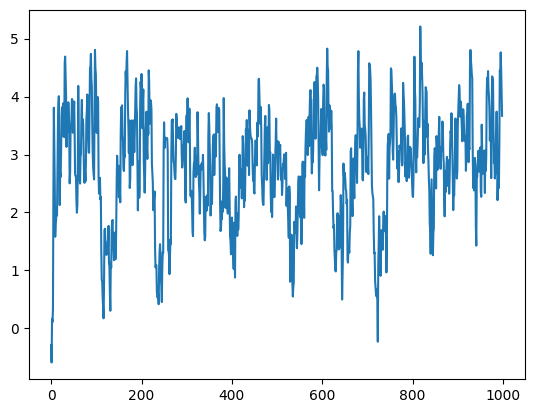

In [11]:
sns.lineplot(x_vels)

In [3]:
LOG_DIR = "../../logs/ppo/crafter-safe/test/test-safe-multi-rewards-adv-adapt-2.5-new-200-no-health-pen-01"
episode_data = joblib.load(os.path.join(LOG_DIR, "episode_data.joblib"))[0][0]

In [4]:
print(episode_data.keys())
print(episode_data['obs'][0]['obs'].shape)

for k, v in episode_data.items():
    print(k, len(v))
N = len(episode_data['obs'])

dict_keys(['obs', 'normalized_obs', 'actions', 'values', 'rewards', 'terminated', 'truncated', 'infos'])
(3, 84, 84)
obs 201
normalized_obs 200
actions 200
values 200
rewards 200
terminated 200
truncated 200
infos 201


[ 83  86 165]


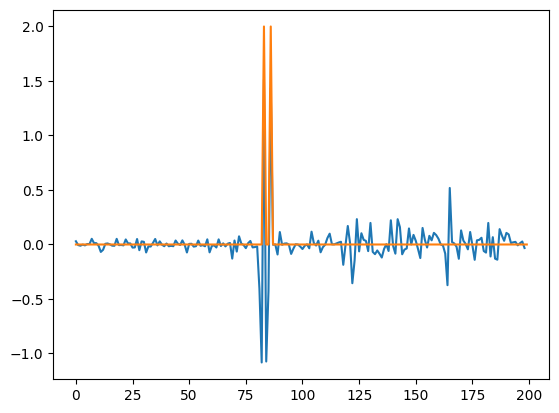

In [5]:
obs = [episode_data['obs'][i]['obs'] for i in range(N)]
values = np.stack(episode_data['values'], 0)
rewards = np.stack(episode_data['rewards'], 0)
# sns.lineplot(values[:, 0])
diff = values[:N - 2, 1] - values[1:, 1]
sns.lineplot(diff)
sns.lineplot(rewards[:, 1])
print(np.nonzero(diff > 0.25)[0])

[[ 0.   0. ]
 [-0.6  1. ]]
6
{'inventory': {'health': 0, 'food': 3, 'drink': 4, 'energy': 7, 'sapling': 0, 'wood': 5, 'stone': 9, 'coal': 6, 'iron': 0, 'diamond': 0, 'wood_pickaxe': 1, 'stone_pickaxe': 1, 'iron_pickaxe': 0, 'wood_sword': 1, 'stone_sword': 1, 'iron_sword': 0}, 'achievements': {'collect_coal': 6, 'collect_diamond': 0, 'collect_drink': 5, 'collect_iron': 0, 'collect_sapling': 1, 'collect_stone': 36, 'collect_wood': 15, 'defeat_skeleton': 1, 'defeat_zombie': 2, 'eat_cow': 1, 'eat_plant': 0, 'make_iron_pickaxe': 0, 'make_iron_sword': 0, 'make_stone_pickaxe': 1, 'make_stone_sword': 1, 'make_wood_pickaxe': 1, 'make_wood_sword': 1, 'place_furnace': 2, 'place_plant': 1, 'place_stone': 1, 'place_table': 3, 'wake_up': 1}, 'discount': 0.0, 'semantic': array([[5, 1, 3, ..., 3, 4, 4],
       [5, 1, 1, ..., 2, 2, 4],
       [5, 1, 1, ..., 2, 2, 4],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), 'player_pos': 

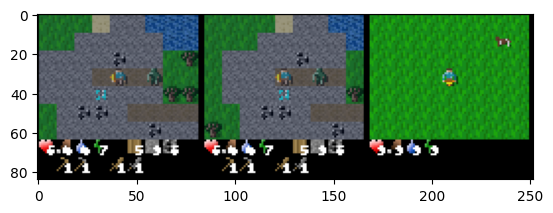

: 

In [66]:
visualize(obs[268:271])
print(rewards[268:270])
print(episode_data['actions'][269])
print(episode_data['infos'][270])